In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

# Here Xception model is implemented 

from tensorflow.keras.applications.xception import Xception

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [229, 229]
        
train_path = './Datasets/Deep_Learning(Data)/Training Set/'
valid_path = './Datasets/Deep_Learning(Data)/Testing Set/ '

In [4]:
# Import the Resnet50 or Resnet50 V2 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

Xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 16s 0us/step


In [5]:
# don't train existing weights
for layer in Xception.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('./Datasets/Deep_Learning(Data)/Training Set/*')

In [7]:
len(folders)

2

In [8]:
# our layers - you can add more if you want
x = Flatten()(Xception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=Xception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 229, 229, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 114, 114, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 114, 114, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 114, 114, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 300

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=90,#try with 45
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2, #try with zoom_range=[0.5,1.0]
        horizontal_flip=True,
        brightness_range=[0.2,1.0],
        fill_mode='nearest') # try to change the parameters such as constant,wrap,reflect

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./Datasets/Deep_Learning(Data)/Training Set/',
                                                 target_size = (229,229),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('./Datasets/Deep_Learning(Data)/Testing Set/',
                                            target_size = (229,229),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 54570 images belonging to 2 classes.
Found 19242 images belonging to 2 classes.


In [13]:
len(training_set)

182

In [14]:
training_set.class_indices

{'Fire': 0, 'No_Fire': 1}

In [15]:
imgs ,labels = next(training_set)

In [16]:
from matplotlib import pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

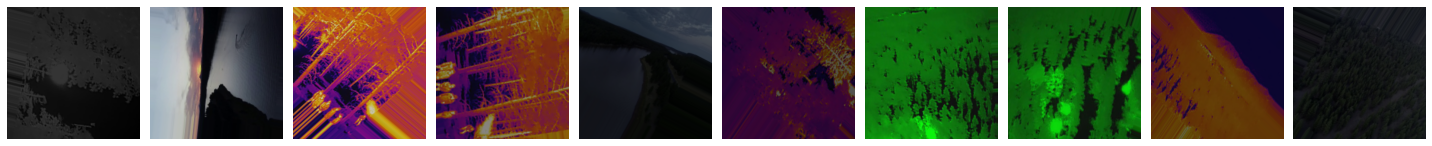

[0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]


In [17]:
plotImages(imgs)
print(labels)

In [18]:
#Add checkpoints 
from keras.callbacks import ModelCheckpoint
#filepath='saved_models/models.h5'
filepath="./FirevsNonFire_Xception_transfer_learning_model_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# fit the model
history = model.fit(
  training_set,
  validation_data=test_set, 
  epochs=10,
  steps_per_epoch= 50000 // batch_size,
  validation_steps= 15000 // batch_size) #callbacks (if needed)

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('FirevsNonFire_Xception_transfer_learning_model_weights-improvement.h5')

-----------------------------------------------------------------------------------------

In [ ]:
from tensorflow import keras

model = keras.models.load_model(' ')

In [ ]:
y_pred = model.predict(test_set) 

In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

In [ ]:
misclassified=np.where(test_set!=y_pred)
misclassified

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os 

image_directory = 'Datasets/Deep_Learning(Data)/New/Fire/'
firecount=0
nofirecount=0
for i in os.listdir(image_directory):
    img = image.load_img(image_directory+'//'+i,target_size=(224,224))
    plt.imshow(img)
    img = image.img_to_array(img)
    x = img.reshape((1,)+ img.shape)
    val = model.predict(x) 
    val = np.argmax(val, axis=1)
    plt.show() 
    if(val == 0 ):
        print("Fire")
        firecount+=1
    else:
        print("No Fire")
        nofirecount+=1
print("Fire Images:",firecount)
print("No Fire Images:",nofirecount)

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os 

image_directory = 'Datasets/Deep_Learning(Data)/New/No_Fire/'
firecount=0
nofirecount=0
for i in os.listdir(image_directory):
    img = image.load_img(image_directory+'//'+i,target_size=(224,224))
    plt.imshow(img)
    img = image.img_to_array(img)
    x = img.reshape((1,)+ img.shape)
    val = model.predict(x) 
    val = np.argmax(val, axis=1)
    plt.show() 
    if(val == 0 ):
        print("Fire")
        firecount+=1
    else:
        print("No Fire")
        nofirecount+=1
print("Fire Images:",firecount)
print("No Fire Images:",nofirecount)